Miałem za zadanie stworzyć model regresji logistycznej, który będzie przewidywał jakość wina na podstawie jego fizykochemicznych właściwości. Korzystałem z zestawu danych z folderu DataSetGrupa3 o nazwie wine.csv.

In [59]:
# W tej komorce bede importowal potrzebne mi biblioteki

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report, plot_confusion_matrix
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score


Przystępując do zadania importuję potrzebne mi biblioteki do generowania kodu. Na bieżaco wracałem do tej komórki i uzupełniałem ją o niezbędne biblioteki.



In [40]:
# wczytuje odpowiedni zestaw danych

df=pd.read_csv('wine.csv')

Po wczytaniu odpowiedniego pliku, przy pomocy funkcji display() i df.describe() obejrzałem wstępnie swoje dane, zauważyłem, że kolumna klasyfikująca zawiera dane tekstowe 'good', 'bad', zamieniłem je na odpowiednio na '0' i '1'. 

In [41]:
# ogladam swoje dane

display(df)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,bad
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,bad
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,bad
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,good
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,bad
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,bad
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,good
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,good
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,bad


In [6]:
# wyswietlam podstawowe statystki
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000


In [42]:
 #zamieniam wartości tekstowe na numeryczne w kolumnie klasyfikującej

df['quality'] = df['quality'].map(lambda x: 0 if x=='good' else 1)

In [43]:
#sprawdzam czy się zmieniły wyświetlając 5 pierwszych 

df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,1


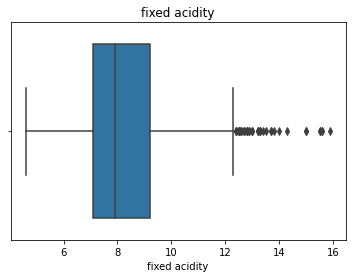

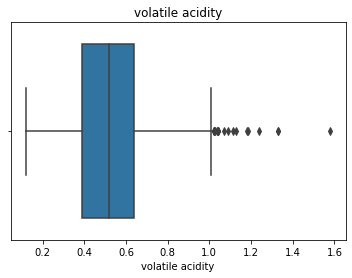

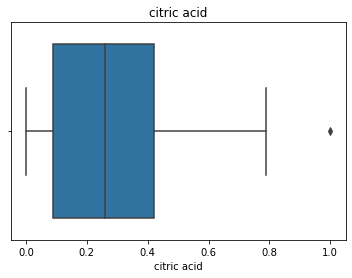

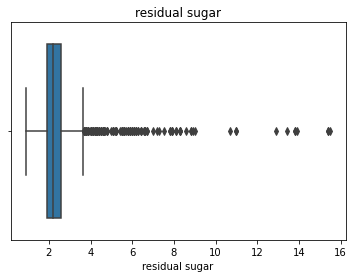

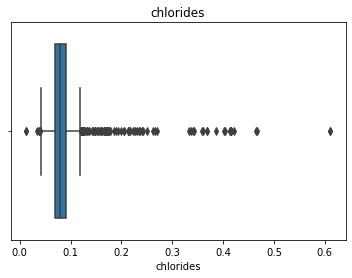

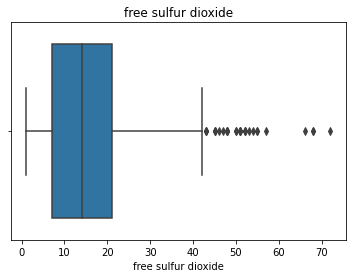

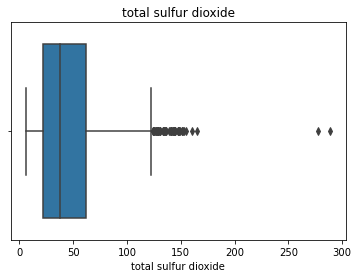

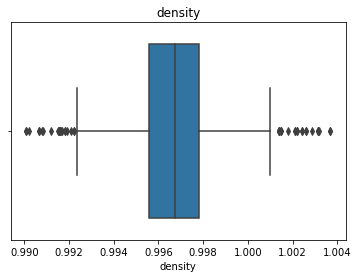

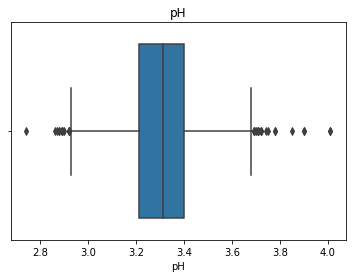

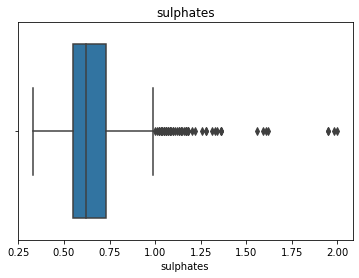

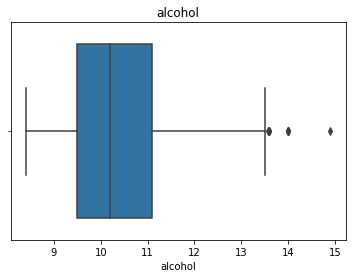

In [10]:
# ogladam dane z poszczegolnych kolumn na wykresach, wybralem wykres boxplot

for col in df.columns[:-1]:
    plt.figure()
    sns.boxplot(x=df[col])
    plt.title(col)

plt.show()

W powyższym kodzie, stworzyłem pętle for dla każdej kolumny z dataframe 'df' z wyjątkiem ostatniej kolumny 'quality', która zawiera jedynie zmienne binarne 0 i 1.
W środku pętli stworzyłem nową figurę przy pomocy plt.figure() i narysowałem wykresy boxplot dla danej kolumny za pomocą sns.boxplot(x=df[col]). Zmieniłem nazwę wykresu na nazwę kolumny.
Na końcu, wyświetliłem wszystkie wykresy po pętli przy pomocy plt.show().
Dzięki boxplotom możemy zobaczyć czy istnieją pewne wartości znacznie odbiegające od reszty danych.

In [63]:
# wypisuje cechy X na podstawie których przewidujemy cel, czyli y 

X = df[['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']].to_numpy()
y = df['quality'].to_numpy()

In [45]:
# tworze pusta liste
scores = []

# tworze podział danych KFold o liczbie foldow równej 7
# shuffle = False oznacza, ze nie mieszam danych przed podzialem
kf = KFold(n_splits=7, shuffle=False)

# petla for iteruje po indeksach danych treningowych i testowych dostarczonych przez kf.split(X)
# tworze zbior treningowy X i testowy X
# następnie tworze zbior etykietowy y dla danych treningowych i testowych
# tworze model regresji logistycznej z maksymalna liczbą iteracji 10000, a nastepnie trenuje go na danych treningowych
# obliczam skutecznosc modelu na danych testowych i zapisuje ja do listy scores
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    model = LogisticRegression(max_iter=10000)
    model.fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))

# pokazuje wyniki w tablicy i srednia     
print(scores)
print(np.mean(scores))

# koncowy model regresji logistycznej, trenuje go na calych danych X,y
final_model = LogisticRegression(max_iter=10000)
final_model.fit(X, y)

[0.7205240174672489, 0.7205240174672489, 0.7030567685589519, 0.7280701754385965, 0.7807017543859649, 0.7675438596491229, 0.7412280701754386]
0.737378380448939


LogisticRegression(max_iter=10000)

In [47]:
# prognozy na pierwszych 10 rekordach

print("wartosci oczekiwane: ", final_model.predict(X[:10]))
print("wartosci rzeczywiste: ", y[:10])

wartosci oczekiwane:  [1 1 1 0 1 1 1 1 1 1]
wartosci rzeczywiste:  [1 1 1 0 1 1 1 0 0 1]


Powyższy kod umożliwił mi stworzenie modelu regresji logistycznej. W komentarzach do kodu objaśniałem kolejne kroki. Model dopasowany jest na poziomie 0.74 (średnia dla z 7 foldów), co oznacza, że nie jest najgorszym modelem, ale z pewnością mógłby działać lepiej. Być może sposobem na lepsze jego wytrenowanie jest zwiększenie ilości danych treningowych lub usunięcie wartości odstających.

In [52]:
#ewaluacja modelu podstawowymi metrykami: dokładnoscia, precyzja, pelnoscia i wynikiem F1,

y_pred = final_model.predict(X)
print("accuracy:", accuracy_score(y, y_pred))
print("precision:", precision_score(y, y_pred))
print("recall:", recall_score(y, y_pred))
print("f1 score:", f1_score(y, y_pred))


accuracy: 0.7479674796747967
precision: 0.7211413748378729
recall: 0.7473118279569892
f1 score: 0.733993399339934


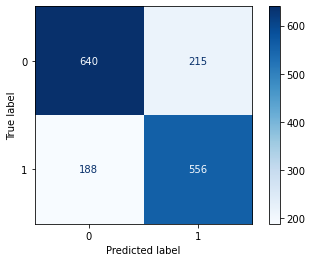

In [53]:
# pokazuje macierz pomylek

plot_confusion_matrix(final_model, X, y, cmap= 'Blues')


Macierz pomyłek pokazuje nam, że na 828 przypadków 640 predykcji modelu sprawdziło się, gdy wino było 'good' a 188 nie. Z kolei na 771 przypadków, 556 model przewidział, że wino jest 'bad' a 215 razy źle ocenił jakość trunku.

In [61]:
def score_model(X, y, kf):
    logreg = LogisticRegression(max_iter=10000)
    scores = cross_val_score(logreg, X, y, cv=kf)
    return np.mean(scores)

# tworze podział danych KFold o liczbie foldów równej 7
kf = KFold(n_splits=7, shuffle=False)

# wywołuje funkcje score_model
mean_acc = score_model(X, y, kf)

# wyswietlam wynik
print("sredni wynik klasyfikacji dla regresji logistycznej: ", mean_acc)


sredni wynik klasyfikacji dla regresji logistycznej:  0.737378380448939


Powyższa funkcja tworzy model regresji logistycznej i ocenia jego skuteczność za pomocą krzyżowej walidacji z użyciem obiektu podziału danych kf. Wynik otrzymany za pomocą funkcji cross_val_score jest średnią skuteczności modelu z poszczególnych foldów. W przykładzie, jest on zwracany przez funkcję oraz drukowany na ekranie.

In [36]:
# podzial na zbiory testowe i trenigowe
X = df.drop('quality', axis=1)
y = df['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# trenowanie modelu
lr = LogisticRegression(max_iter=10000)
lr.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [37]:
y_scores = lr.predict_proba(X_test)[:,1]

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

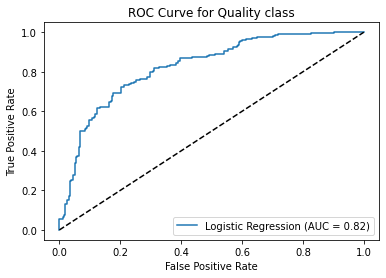

In [38]:
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Quality class')
plt.legend(loc="lower right")
plt.show()

W ostatnim kroku narysowałem krzywą ROC. Będąc funkcją punktu odcięcia,krzywa, przedstawia zmienność TPR (miary pokrycia / wychwycenia klasy faktycznie pozytywnej) w zależności od FPR (poziomu błędu popełnianego na klasie faktycznie negatywnej). Współczynnik AUC oznacza prawdopodobieństwo, że losowo wybrany element klasy pozytywnej otrzyma wyższą wartość 'score' niż losowo wybrany element klasy negatywnej.